In [177]:
import numpy as np
import matplotlib.pyplot as plt

In [178]:
def advection(xi, rho, ui, dt):
    N = len(rho)
    dx = xi[1] - xi[0]
    rhonew = np.zeros_like(rho)
    
    # Calculate fluxes
    F = np.zeros_like(ui)
    F[ui > 0] = rho[ui > 0] * ui[ui > 0]
    F[ui < 0] = np.roll(rho, -1)[ui < 0] * ui[ui < 0]
    
    # Update interior points
    rhonew[1:-1] = rho[1:-1] - dt * (F[1:-1] - F[:-2]) / dx
    
    # Update boundary points with periodic conditions
    rhonew[0] = rho[0] - dt * (F[0] - F[-1]) / dx
    rhonew[-1] = rho[-1] - dt * (F[-1] - F[-2]) / dx
    
    return rhonew

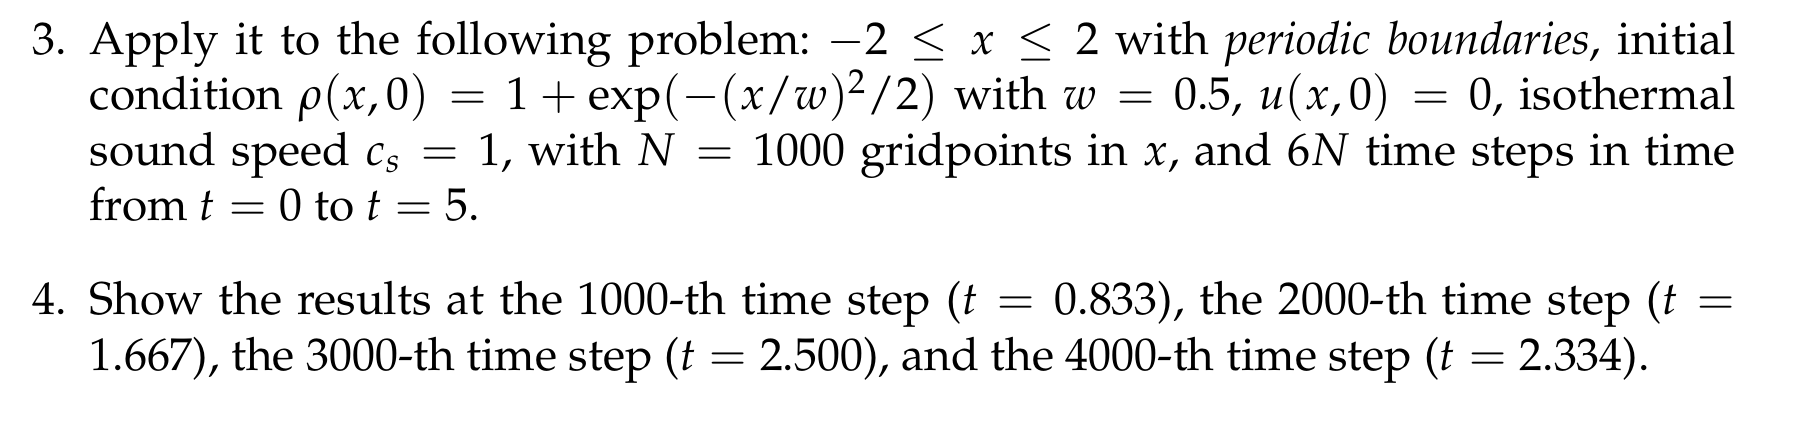

In [179]:
N = 1000
w = 0.5
xi = np.linspace(-2, 2, N)
ts = np.linspace(0, 5, 6*N)

rhos = np.zeros((6*N, N))
us = np.zeros((6*N, N))
dt = ts[1] - ts[0]
sound_speed = 1
rho_0 = 1.0 + np.exp(-(xi/w)**2 / 2)
u_0 = 0.0 * xi
u_test = u_0 + 1.0

In [180]:
def rhs_p(p, xi):

    dx = xi[1] - xi[0]
    
    rhs = np.zeros(p.shape)
    for i in range(N):
        rhs[i] = -(p[(i+1) % N] - p[(i-1) % N]) / (2*dx)

    # as the rho is symmetric over the edges,
    # the symmetric derivative vanishes -- i think!

    #rhs[0] = 0
    #rhs[N-1] = 0
    return rhs

In [181]:
def timestep(q0, q1, xi, u, dt):
    #inforce boundary
    q0_tilde = advection(xi, q0, u, dt)
    q1_tilde = advection(xi, q1, u, dt)

    q0_tilde[0] = q0_tilde[N-2]
    q0_tilde[N-1] = q0_tilde[1]

    q1_tilde[0] = q1_tilde[N-2]
    q1_tilde[N-1] = q1_tilde[1]

    #plt.title("q0 Tilde")
    #plt.plot(q0_tilde[:15])
    #plt.plot(q0_tilde[-15:])
    #plt.show()
    
    #inforce boundary
    p = q0_tilde * sound_speed**2
    RHS = rhs_p(p, xi)

    #plt.plot(RHS[:])
    #plt.show()
    
    q0 = q0_tilde
    q1 = q1_tilde + dt * RHS

    q0[0] = q0[-2]
    q0[-1] = q0[1]
    q1[0] = q1[-2]
    q1[-1] = q1[1]

    #plt.title("q1")
    #plt.plot(q1[:15])
    #plt.plot(q1[-15:])
    #plt.show()

    return q0, q1

In [182]:
def uhalf(ui):
    unew = np.zeros(ui.shape)
    for i in range(1,N-1):
        unew[i] = 0.5 * (ui[i] + ui[i+1])
    
    unew[0] = 0
    unew[N-1] = 0
    return unew

/tmp/ipykernel_222410/77708854.py:9: RuntimeWarning: overflow encountered in multiply
  F[ui < 0] = np.roll(rho, -1)[ui < 0] * ui[ui < 0]
/tmp/ipykernel_222410/487367207.py:25: RuntimeWarning: invalid value encountered in add
  q1 = q1_tilde + dt * RHS
/tmp/ipykernel_222410/2390461507.py:17: RuntimeWarning: invalid value encountered in divide
  u = q1 / q0
/tmp/ipykernel_222410/77708854.py:12: RuntimeWarning: invalid value encountered in subtract
  rhonew[1:-1] = rho[1:-1] - dt * (F[1:-1] - F[:-2]) / dx
/tmp/ipykernel_222410/3007265024.py:7: RuntimeWarning: invalid value encountered in scalar subtract
  rhs[i] = -(p[(i+1) % N] - p[(i-1) % N]) / (2*dx)
/tmp/ipykernel_222410/77708854.py:15: RuntimeWarning: invalid value encountered in scalar subtract
  rhonew[0] = rho[0] - dt * (F[0] - F[-1]) / dx
/tmp/ipykernel_222410/77708854.py:16: RuntimeWarning: invalid value encountered in scalar subtract
  rhonew[-1] = rho[-1] - dt * (F[-1] - F[-2]) / dx
/tmp/ipykernel_222410/77708854.py:8: Runtim

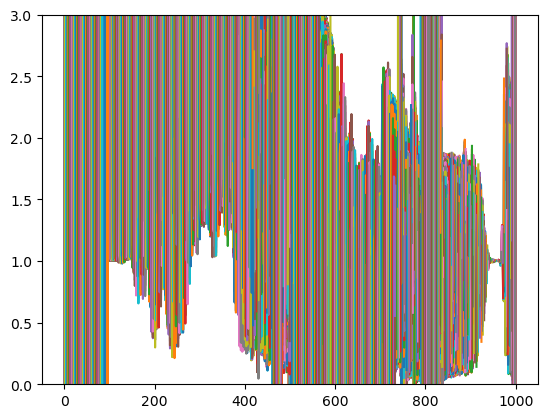

In [191]:
q0 = rho_0
q1 = u_0 * rho_0
u = u_0
for n,t in enumerate(ts[:500]):
    #print(n)
    plt.plot(q0)
    plt.ylim(0, 3)

    #print(q0.shape)
    #print(q1.shape)
    #print(n)
    q0, q1 = timestep(q0, q1, xi, u, dt)
    #plt.plot(q0)
    #plt.show()
    #plt.plot(q1[:5])
    #plt.show()
    u = q1 / q0

    #plt.plot(u)
    #plt.show()
    rhos[n, :] = q0
    us[n:, ] = u
    #u = uhalf(u)

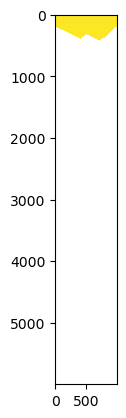

In [190]:
plt.imshow(us[:, :])